In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data_train = pd.read_csv(r"C:\Users\inf\Documents\Master\Titanic\titanic\train.csv")

In [3]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


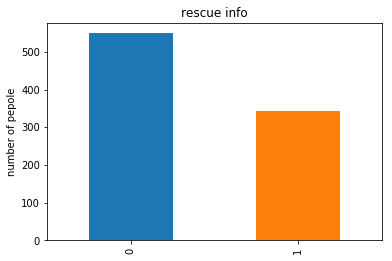

In [5]:
fig = plt.figure()
fig.set(alpha=0.2)
data_train.Survived.value_counts().plot(kind='bar');
plt.title(u"rescue info");
plt.ylabel(u"number of pepole");

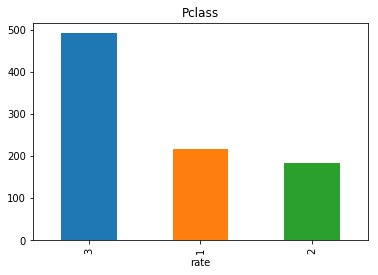

In [42]:
data_train.Pclass.value_counts().plot(kind='bar');
plt.xlabel(r"rate")
plt.title(u"Pclass");


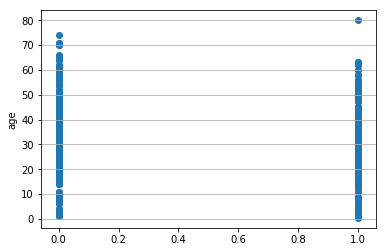

In [13]:
plt.scatter(data_train.Survived,data_train.Age);
plt.ylabel(u"age")
plt.grid(b=True,which='major',axis="y")


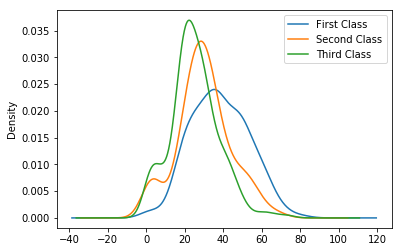

In [14]:
data_train.Age[data_train.Pclass==1].plot(kind='kde')
data_train.Age[data_train.Pclass==2].plot(kind='kde')
data_train.Age[data_train.Pclass==3].plot(kind='kde')
plt.legend((u'First Class',u'Second Class',u'Third Class'),loc='best');

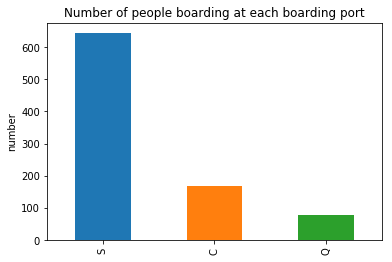

In [15]:
data_train.Embarked.value_counts().plot(kind='bar');
plt.title(u"Number of people boarding at each boarding port")
plt.ylabel(u"number");


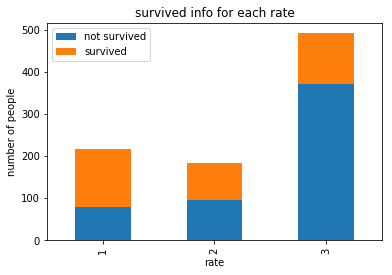

In [16]:
Survived_0=data_train.Pclass[data_train.Survived==0].value_counts()
Survived_1=data_train.Pclass[data_train.Survived==1].value_counts()
df=pd.DataFrame({u"not survived":Survived_0,u"survived":Survived_1});
df.plot(kind='bar',stacked=True);
plt.title(u"survived info for each rate")
plt.xlabel(u"rate")
plt.ylabel(u"number of people");

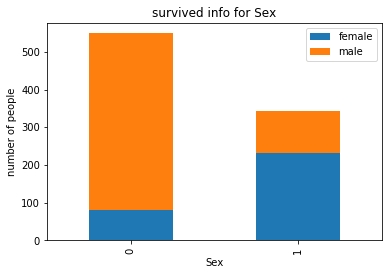

In [17]:
Survived_male= data_train.Survived[data_train.Sex=='male'].value_counts()
Survived_female=data_train.Survived[data_train.Sex=='female'].value_counts()
#df=pd.DataFrame({u"male":Survived_male,u"female":Survived_female})
df=pd.DataFrame({u"female":Survived_female,u"male":Survived_male})

df.plot(kind='bar',stacked=True)
plt.title(u"survived info for Sex")
plt.xlabel(u"Sex")
plt.ylabel(u"number of people");

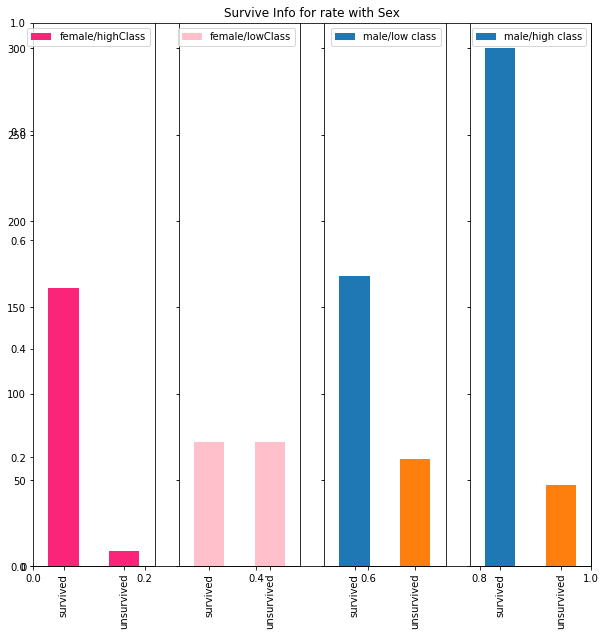

In [31]:
fig=plt.figure(figsize=(10,10))
plt.title(u"Survive Info for rate with Sex")

ax1=fig.add_subplot(141)

data_train.Survived[data_train.Sex=='female'][data_train.Pclass !=3].value_counts().plot(kind='bar',label="female highClass",color='#FA2479')
ax1.set_xticklabels([u"survived",u"unsurvived"],rotation=90)
ax1.legend([u"female/highClass"],loc='best')

ax2=fig.add_subplot(142,sharey=ax1)
data_train.Survived[data_train.Sex=='female'][data_train.Pclass==3].value_counts().plot(kind='bar',label="female low class",color='pink')
ax2.set_xticklabels([u"survived",u"unsurvived"],rotation=90)
ax2.legend([u"female/lowClass"],loc='best')

ax3=fig.add_subplot(143,sharey=ax1)
data_train.Survived[data_train.Sex=='male'][data_train.Pclass!=3].value_counts().plot(kind='bar',label='male')
ax3.set_xticklabels(["survived","unsurvived"],rotation=90)
ax3.legend([u"male/low class"],loc='best')

ax4=fig.add_subplot(144,sharey=ax1)
data_train.Survived[data_train.Sex=='male'][data_train.Pclass==3].value_counts().plot(kind='bar')
ax4.set_xticklabels(["survived","unsurvived"],rotation=90)
ax4.legend([u"male/high class"],loc='best')






#登船港口的影响

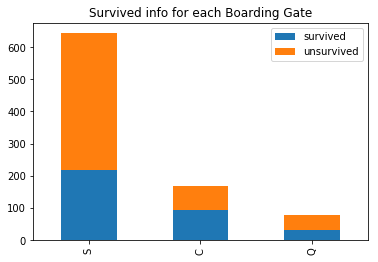

In [37]:
fig =  plt.figure
Survived_0=data_train.Embarked[data_train.Survived==0].value_counts()
Survived_1=data_train.Embarked[data_train.Survived==1].value_counts()
df=pd.DataFrame({'survived':Survived_1,'unsurvived':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title("Survived info for each Boarding Gate");


#堂兄妹 父母人数对获救的影响

In [41]:
g=data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print (df)

g=data_train.groupby(['SibSp',"Survived"])
df=pd.DataFrame(g.count()['PassengerId'])
print (df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
